In [1]:
# Importing all libraries required in this notebook
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data from remote link
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Check whether any column contain missing value or not
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
# Check whether any column is skewed or not
df['Hours'].skew()

0.1903382010052985

In [5]:
df['Scores'].skew()

0.2339646665397317

In [6]:
con_col = ['Hours']
target = 'Scores'

C:\Users\Vill\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


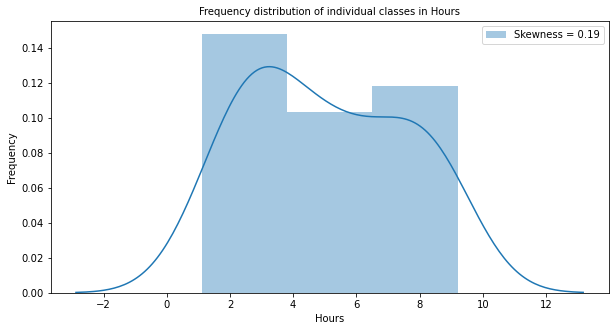

In [7]:
#Univariate Analysis:
for col in con_col:
    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_subplot(111)
    ax = sn.distplot(df[col],label='Skewness = %.2f'%(df[col].skew()))
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend(loc='best')
    ax.set_title('Frequency distribution of individual classes in {}'.format(col), fontsize=10)

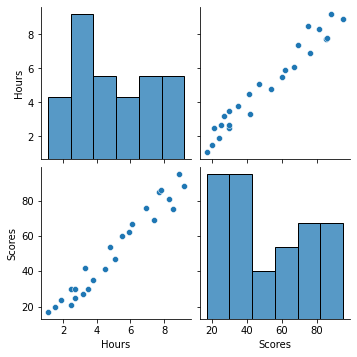

In [8]:
#Bivariate Analysis:
    
sn.pairplot(df[con_col+[target]])

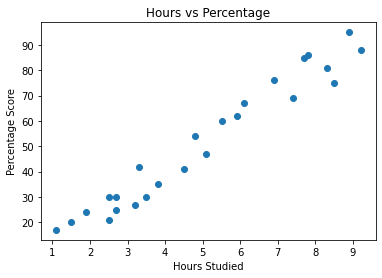

In [9]:
# Plotting the distribution of scores
plt.scatter(x='Hours', y='Scores', data=df)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [10]:
#Preparing the data

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [12]:
#Split this data into training and test sets

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

In [13]:
y_train

array([86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95,
       41], dtype=int64)

In [14]:
X_test.shape

(7, 1)

In [15]:
y_test.shape

(7,)

In [16]:
#Training the Algorithm

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


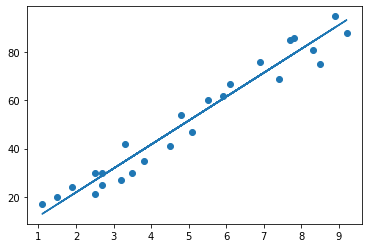

In [17]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [18]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [20]:
# Test with your own data
hours = 9.25
hours = np.array(hours).reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652


In [21]:
# Evaluating the model

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502481
